<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 10x 50px;">Table des matières</h1>





* [1. Libraries](#1)


* [2. Exploration des données](#2)


* [3. première approche de résolution](#3)


* [4. Deuxième approche de résolution](#4)






<a id='1'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Librairies</h1>

In [511]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud

import re

import warnings
warnings.filterwarnings('ignore')



<a id='2'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Exploration des données</h1>

In [512]:
data=pd.read_json('../Data/datasetProjet2022.json')
data

,user_lang,tweet_coordinates_geojson,loc_point_geojson,doublon,country,tweet_source,tweet_current_user_retweet,user_location,tweet_coordinates_geom,user_geo_enabled,...,user_friends_count,tweet_coordinates,tweet_mtion,tweet_lang,id_filtre,tweet_favorite_count,user_listed_counted,tweet_id,place_bbox_geom,user_utc_offset
0,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,None,None,0.0,...,4997.0,None,None,fr,63,0.0,41.0,1154707909470801920,None,-1.0
1,None,None,NaN,False,None,"<a href=""http://twitter.com/download/android"" ...",-1.0,None,None,0.0,...,654.0,None,None,fr,63,0.0,0.0,1154708887871922177,None,-1.0
2,None,None,NaN,False,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",-1.0,France,None,0.0,...,321.0,None,HuetSylvestre ;,fr,63,0.0,0.0,1154709490442342400,None,-1.0
3,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,None,None,1.0,...,2027.0,None,None,fr,63,0.0,103.0,1154711387345735680,None,-1.0
4,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,94uzi,None,1.0,...,526.0,None,None,fr,63,0.0,339.0,1154722470986997761,None,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,None,None,NaN,False,None,"<a href=""http://wildmoka.com"" rel=""nofollow"">W...",-1.0,"Paris, France",None,1.0,...,1257.0,None,None,fr,63,0.0,525.0,1154705207604981762,None,-1.0
517297,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,agen,None,1.0,...,599.0,None,None,fr,63,0.0,12.0,1154706722243698688,None,-1.0
517298,None,None,NaN,False,None,"<a href=""http://twitter.com/download/android"" ...",-1.0,Là.,None,1.0,...,383.0,None,Ludovic_P_ ;,fr,63,0.0,81.0,1154707110447345664,None,-1.0
517299,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,None,None,0.0,...,0.0,None,None,fr,63,0.0,6.0,1154707463553323008,None,-1.0


In [513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517301 entries, 0 to 517300
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   user_lang                    208530 non-null  object        
 1   tweet_coordinates_geojson    2240 non-null    object        
 2   loc_point_geojson            0 non-null       float64       
 3   doublon                      517301 non-null  bool          
 4   country                      12283 non-null   object        
 5   tweet_source                 517301 non-null  object        
 6   tweet_current_user_retweet   506405 non-null  float64       
 7   user_location                394636 non-null  object        
 8   tweet_coordinates_geom       2240 non-null    object        
 9   user_geo_enabled             512059 non-null  float64       
 10  hashtags                     139703 non-null  object        
 11  user_favorites_count      

In [514]:
# recherche des valeurs manquantes

def missing_values(data):
    
    total=(data.isnull().sum().sort_values(ascending=False))
    percent_missing=(total/data.isnull().count()).sort_values(ascending=False)
    missin_df=pd.concat([total,percent_missing],keys=['total_missing','percent_missing'],axis=1)
    return missin_df

In [515]:
missing_values(data)

,total_missing,percent_missing
indice_localisation,517301,1.000000
loc_point_geojson,517301,1.000000
loc_geojson,517301,1.000000
localisation,517301,1.000000
tweet_coordinates_geom,515061,0.995670
tweet_coordinates_longitude,515061,0.995670
tweet_coordinates_geojson,515061,0.995670
tweet_coordinates_latitude,515061,0.995670
tweet_coordinates,515061,0.995670
place_bbox,505228,0.976662


### Remarques: 

- Le pourcentage de valeurs maquantes atteints les 100%, pour certaine valeur
- La valeur **id_evt** considérée comme notre **target** possède **86% des valeurs sont nulles**

In [516]:
# découverte des différents colonnes et leurs valeurs

for c in data.columns:
    print('--------------')
    print('la colonne {} est de type {}'.format(c,data[c].dtype))
    print(data[c].unique())

--------------
la colonne user_lang est de type object
[None 'fr' 'en' 'tr' 'nl' 'es' 'ja' 'en-gb' 'ru' 'de' 'it' 'pt' 'hu'
 'zh-cn' 'ar' 'ro' 'vi' 'el' 'sr' 'id' 'gl' 'sv' 'fa' 'he' 'ko' 'en-GB'
 'fi' 'ca' 'fil' 'xx-lc' 'pl' 'cs' 'bg' 'th' 'zh-tw' 'zh-CN' 'hi' 'ms'
 'no' 'eu' 'da' 'fr-CA' 'es-MX' 'hr' 'ta']
--------------
la colonne tweet_coordinates_geojson est de type object
[None '{"type":"Point","coordinates":[-149.62,62.228]}'
 '{"type":"Point","coordinates":[-149.294,62.632]}' ...
 '{"type":"Point","coordinates":[-97.464,-33.503]}'
 '{"type":"Point","coordinates":[-150.793,62.515]}'
 '{"type":"Point","coordinates":[-150.008,62.171]}']
--------------
la colonne loc_point_geojson est de type float64
[nan]
--------------
la colonne doublon est de type bool
[False  True]
--------------
la colonne country est de type object
[None 'Turquie' 'France' 'Solomon Islands' 'United States' 'Cameroon'
 "People's Republic of China" 'Republic of the Philippines'
 'United Arab Emirates' 'Madagas

[None
 '((28.632104,40.802734),(28.632104,41.239907),(29.378341,41.239907),(29.378341,40.802734),(28.632104,40.802734))'
 '((36.167579,41.205787),(36.167579,41.420515),(36.51372,41.420515),(36.51372,41.205787),(36.167579,41.205787))'
 ...
 '((0.483196,46.578454),(0.483196,46.614072),(0.573958,46.614072),(0.573958,46.578454),(0.483196,46.578454))'
 '((32.416623,0.164853),(32.416623,0.413682),(32.721697,0.413682),(32.721697,0.164853),(32.416623,0.164853))'
 '((5.495987,45.345391),(5.495987,45.374105),(5.551341,45.374105),(5.551341,45.345391),(5.495987,45.345391))']
--------------
la colonne localisation est de type float64
[nan]
--------------
la colonne id_evt est de type float64
[ nan 254. 255. 256. 257. 258. 259. 260. 342. 341. 261. 318. 317. 326.
 262. 267. 263. 266. 264. 265. 269. 225. 226. 227. 364. 337. 378. 323.
 230. 359. 334. 347. 234. 235. 349. 350. 237. 335. 330. 367. 368. 238.
 239. 241. 240. 312. 313. 344. 353. 242. 243. 329. 343. 244. 315. 245.
 248. 246. 249. 250. 251. 21

### Remarques

- Plusieurs colonnes peuvent nous intéresser mise à part id_evt et les tweets, **on pourra utiliser tweet_retweet_text,tweet_favorite_count...**

In [517]:
numerical_data=data.select_dtypes(exclude=['object'])
categorical_data=data.select_dtypes(include=['object'])
print('shape de nos données numerique {}'.format(numerical_data.shape))
print('shape de nos données numerique {}'.format(categorical_data.shape))

shape de nos données numerique (517301, 24)
shape de nos données numerique (517301, 20)


In [518]:
numerical_data

,loc_point_geojson,doublon,tweet_current_user_retweet,user_geo_enabled,user_favorites_count,tweet_created_at,tweet_retweet_count,user_followers_count,tweet_coordinates_longitude,robot,...,loc_geojson,localisation,id_evt,id_alea,user_friends_count,id_filtre,tweet_favorite_count,user_listed_counted,tweet_id,user_utc_offset
0,NaN,False,-1.0,0.0,37990.0,2019-07-26 12:59:53,0.0,2036.0,NaN,False,...,NaN,NaN,NaN,1,4997.0,63,0.0,41.0,1154707909470801920,-1.0
1,NaN,False,-1.0,0.0,9010.0,2019-07-26 13:03:46,0.0,534.0,NaN,False,...,NaN,NaN,NaN,1,654.0,63,0.0,0.0,1154708887871922177,-1.0
2,NaN,False,-1.0,0.0,889.0,2019-07-26 13:06:10,0.0,137.0,NaN,False,...,NaN,NaN,NaN,1,321.0,63,0.0,0.0,1154709490442342400,-1.0
3,NaN,False,-1.0,1.0,45052.0,2019-07-26 13:13:42,0.0,2423.0,NaN,False,...,NaN,NaN,NaN,1,2027.0,63,0.0,103.0,1154711387345735680,-1.0
4,NaN,False,-1.0,1.0,2845.0,2019-07-26 13:57:45,0.0,3321.0,NaN,False,...,NaN,NaN,NaN,1,526.0,63,0.0,339.0,1154722470986997761,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,NaN,False,-1.0,1.0,901.0,2019-07-26 12:49:09,0.0,44018.0,NaN,False,...,NaN,NaN,NaN,1,1257.0,63,0.0,525.0,1154705207604981762,-1.0
517297,NaN,False,-1.0,1.0,1200.0,2019-07-26 12:55:10,0.0,532.0,NaN,False,...,NaN,NaN,NaN,1,599.0,63,0.0,12.0,1154706722243698688,-1.0
517298,NaN,False,-1.0,1.0,1141.0,2019-07-26 12:56:43,0.0,302.0,NaN,False,...,NaN,NaN,NaN,1,383.0,63,0.0,81.0,1154707110447345664,-1.0
517299,NaN,False,-1.0,0.0,10.0,2019-07-26 12:58:07,0.0,140.0,NaN,False,...,NaN,NaN,NaN,1,0.0,63,0.0,6.0,1154707463553323008,-1.0


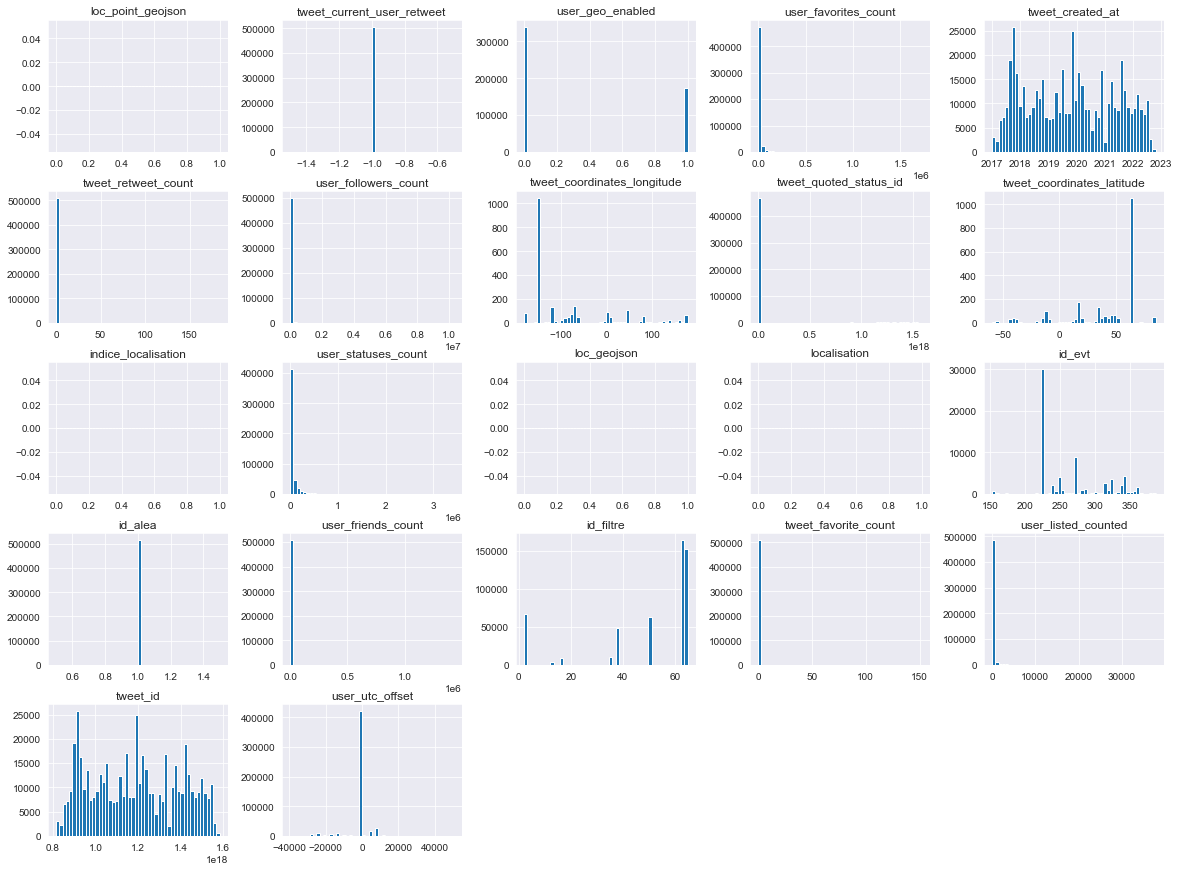

In [519]:
numerical_data.hist(bins=50,figsize=(20,15))
plt.show()


### Remarques 
- On remarque que id_filtre prend des valeurs précises

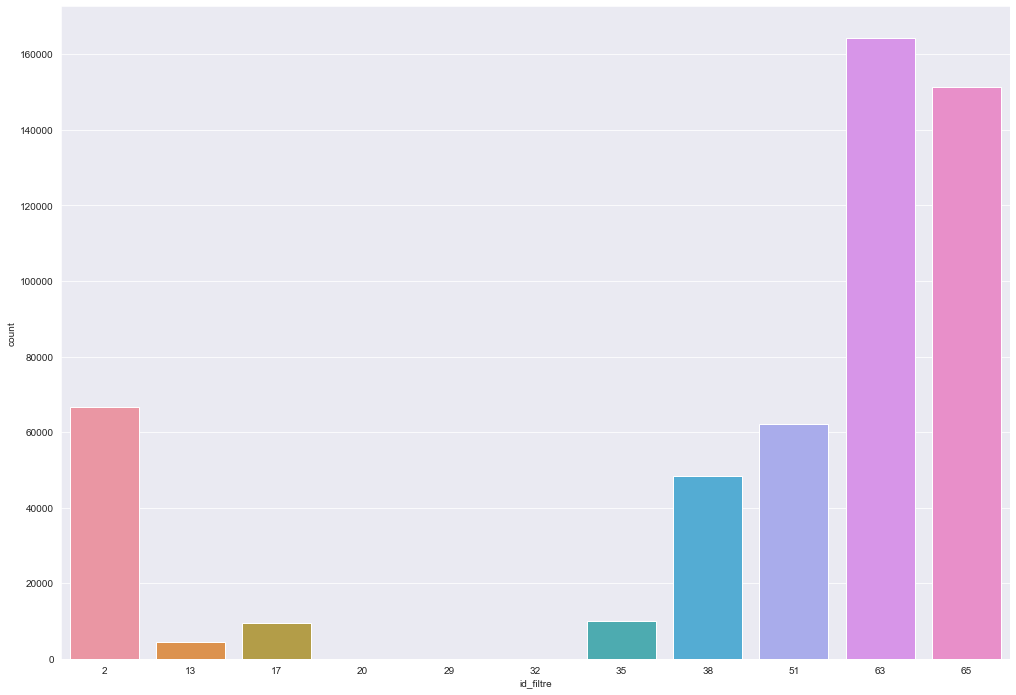

In [520]:
plt.figure(figsize=(17,12))
sns.countplot(data=numerical_data,x='id_filtre')
plt.show()

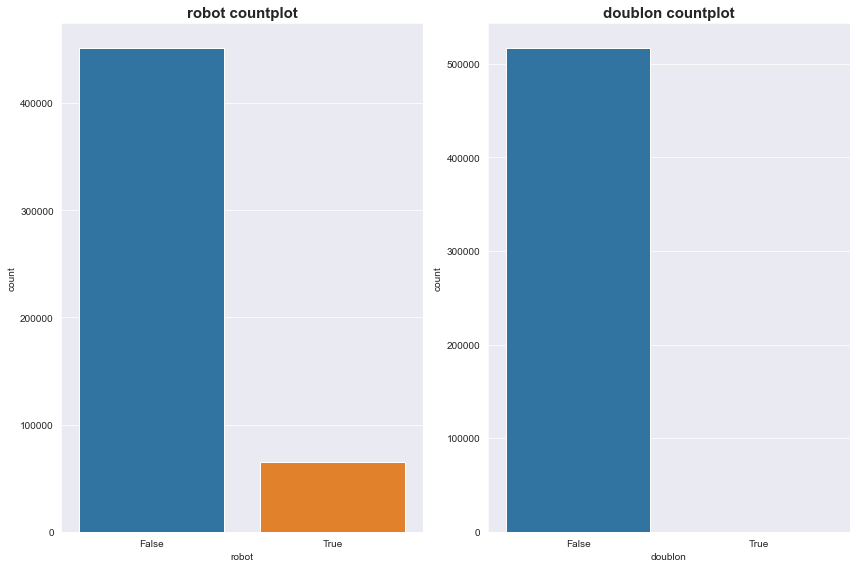

In [521]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.countplot(data=numerical_data,x='robot',ax=axes[0])
axes[0].set_title('robot countplot',fontweight='bold',fontsize=15)
sns.countplot(data=numerical_data,x='doublon',ax=axes[1])
axes[1].set_title('doublon countplot',fontweight='bold',fontsize=15)
fig.tight_layout()
plt.show()


In [522]:
count_id_evt=pd.DataFrame(numerical_data.id_evt.value_counts().reset_index())
count_id_evt.columns=['id_evt','value_count']
count_id_evt

,id_evt,value_count
0,227.0,30046
1,271.0,6428
2,340.0,3768
3,249.0,3332
4,321.0,2974
...,...,...
158,327.0,5
159,293.0,5
160,289.0,5
161,259.0,5


### Remarques: 

- Nos id_evt sont déséquilibrés, en effet on remarque un grand écart entre le nombre de valeur de la id_evt 227 et id_evt 271

In [523]:
categorical_data.head(5)

,user_lang,tweet_coordinates_geojson,country,tweet_source,user_location,tweet_coordinates_geom,hashtags,tweet_text,country_code,place_name,place_bbox,user_time_zone,place_bbox_polygon,place_bbox_geojson,place_type,place_fullname,tweet_coordinates,tweet_mtion,tweet_lang,place_bbox_geom
0,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,séisme ; Istanbul ;,Un #séisme majeur menace #Istanbul – {Sciences...,None,None,None,None,None,None,None,None,None,None,fr,None
1,None,None,None,"<a href=""http://twitter.com/download/android"" ...",None,None,None,Tremblement de terre M3.1 - FRANCE - 31km de L...,None,None,None,None,None,None,None,None,None,None,fr,None
2,None,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",France,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,None,None,None,None,None,None,None,HuetSylvestre ;,fr,None
3,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,None,None,None,None,None,None,None,None,fr,None
4,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",94uzi,None,None,je suis morte ça crie comme si y avait un séisme,None,None,None,None,None,None,None,None,None,None,fr,None


In [524]:
# clean tweet text
def clean_tweets(text):
    #suppresion des mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #suppression des hashtags
    text=re.sub(r'#',"",text)
    #suppresion des retweet
    text=re.sub(r'RT[\s]+','',text)
    #supression des hypers link
    text=re.sub(r'https?:\/\/\S+','',text)
    return text
categorical_data['clean_tweets']=categorical_data['tweet_text'].apply(clean_tweets)

In [525]:
# verification des changement 
i=categorical_data.sample(1).index[0]
print('text originnal : {}'.format(categorical_data['tweet_text'].iloc[i]))
print('------------------modification-----------------')
print('text modifié : {}'.format(categorical_data['clean_tweets'].iloc[i]))

text originnal : Un séisme de magnitude 3,3 vient d'avoir lieu à Strasbourg - Le Lorrain https://t.co/97GBCj8TUj
------------------modification-----------------
text modifié : Un séisme de magnitude 3,3 vient d'avoir lieu à Strasbourg - Le Lorrain 


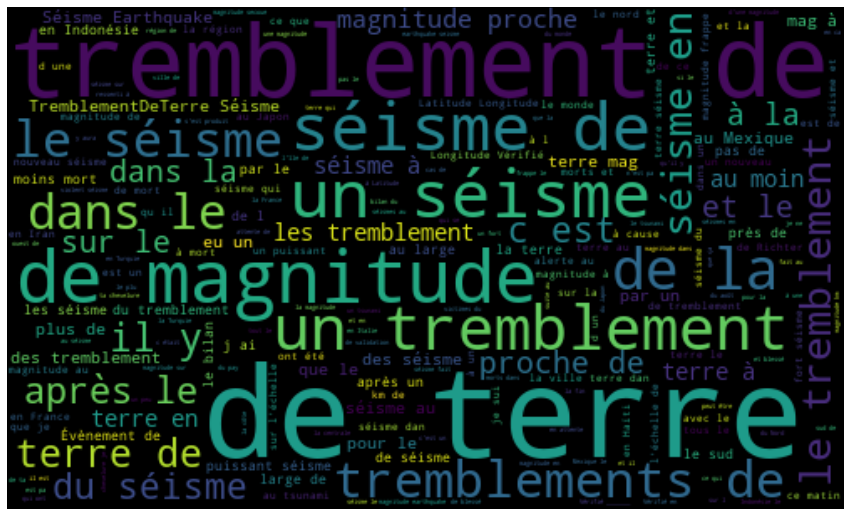

In [526]:
plt.figure(figsize=(15,12))

joinword=''.join([t for t in categorical_data['clean_tweets']])

wordcloud=WordCloud(random_state=42,width=500,height=300).generate(joinword)

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis('off')
plt.show()

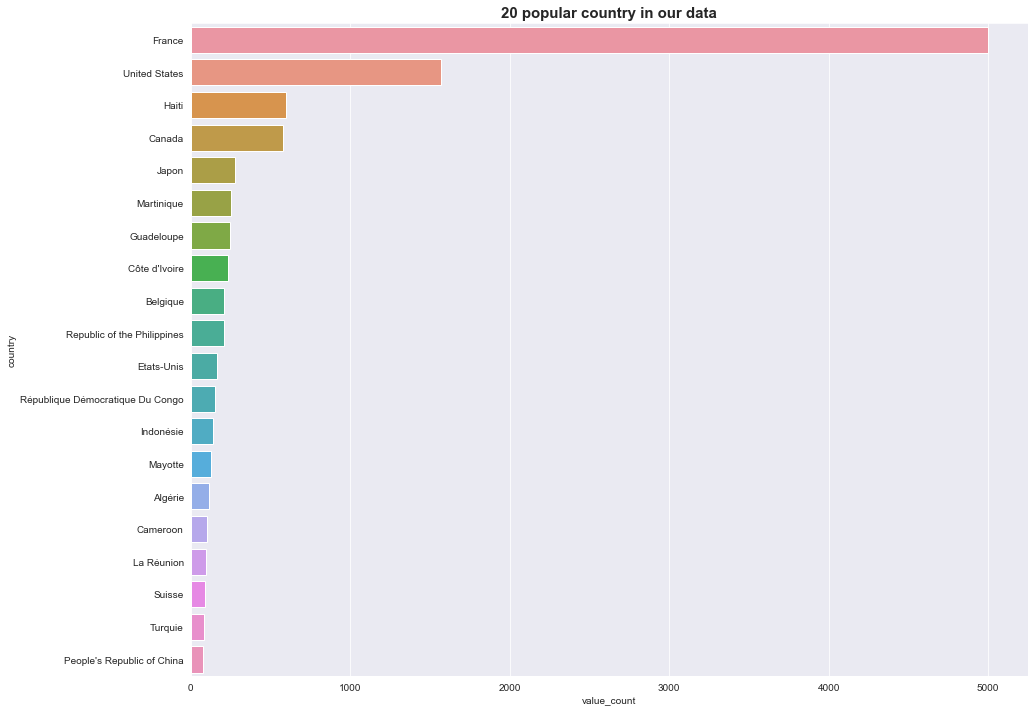

In [527]:
plt.figure(figsize=(15,12))
country_count=categorical_data['country'].value_counts().reset_index()
country_count.columns=['country','value_count']
sns.barplot(data=country_count[:20],y='country',x='value_count')
plt.title('20 popular country in our data',fontweight='bold',fontsize=15)
plt.show()

In [528]:
def count_hashtags(string):

    words = string.split()
    
    hashtags = [word for word in words if word.startswith('#')]
    
    return (len(hashtags))

def count_mentions(string):

    words = string.split()
    
    mentions = [word for word in words if word.startswith('@')]
    
    return (len(mentions))

In [529]:
categorical_data['len_hashtags']=categorical_data['tweet_text'].apply(count_hashtags)
categorical_data['len_mentions']=categorical_data['tweet_text'].apply(count_mentions)

In [530]:
#verification des transformations
i=categorical_data.sample(1).index[0]

print('hashtags donnée {}'.format(categorical_data['hashtags'].iloc[i]))
print('----------------')
print('length trouvé {} '.format(categorical_data['len_hashtags'].iloc[i]))

hashtags donnée tsunami ; NouvelleCalédonie ; séisme ; 
----------------
length trouvé 3 


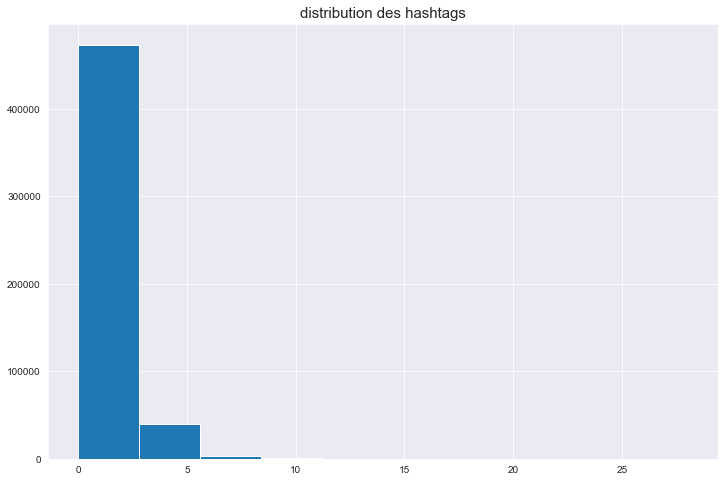

In [531]:
plt.figure(figsize=(12,8))
categorical_data['len_hashtags'].hist()
plt.title('distribution des hashtags',fontsize=15)
plt.show()


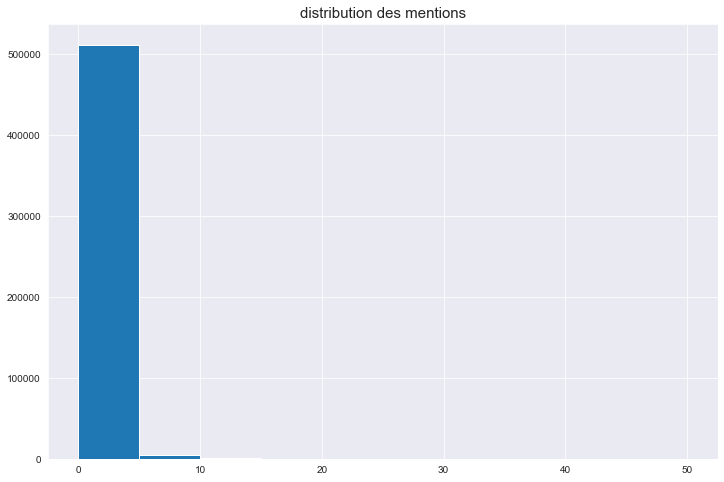

In [532]:
plt.figure(figsize=(12,8))
categorical_data['len_mentions'].hist()
plt.title('distribution des mentions',fontsize=15)
plt.show()

<a id='3'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">1er approche</h1>

In [533]:
data[['tweet_created_at']]

,tweet_created_at
0,2019-07-26 12:59:53
1,2019-07-26 13:03:46
2,2019-07-26 13:06:10
3,2019-07-26 13:13:42
4,2019-07-26 13:57:45
...,...
517296,2019-07-26 12:49:09
517297,2019-07-26 12:55:10
517298,2019-07-26 12:56:43
517299,2019-07-26 12:58:07


### Definition d'une fenetre 

In [534]:
id_evt_pos=data[data['id_evt']>0]
maxi_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].max().reset_index()
min_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].min().reset_index()
date_mini_maxi_df=min_tweet_date.merge(maxi_tweet_date,how='inner',on='id_evt')
date_mini_maxi_df.rename(columns={'tweet_created_at_x':'debut_tweet','tweet_created_at_y':'fin_tweet'},inplace=True)
date_mini_maxi_df['diff_debut_fin']=date_mini_maxi_df['fin_tweet']-date_mini_maxi_df['debut_tweet']
date_mini_maxi_df['day']=date_mini_maxi_df['diff_debut_fin'].dt.components.days
date_mini_maxi_df['hour']=date_mini_maxi_df['diff_debut_fin'].dt.components.hours
date_mini_maxi_df['minutes']=date_mini_maxi_df['diff_debut_fin'].dt.components.minutes
date_mini_maxi_df['seconds']=date_mini_maxi_df['diff_debut_fin'].dt.components.seconds

date_mini_maxi_df


,id_evt,debut_tweet,fin_tweet,diff_debut_fin,day,hour,minutes,seconds
0,153.0,2017-04-17 07:24:13,2017-04-17 07:44:44,0 days 00:20:31,0,0,20,31
1,154.0,2017-05-25 16:37:10,2017-05-25 17:20:11,0 days 00:43:01,0,0,43,1
2,155.0,2017-09-15 12:59:17,2017-09-15 13:32:10,0 days 00:32:53,0,0,32,53
3,156.0,2017-09-28 03:44:08,2017-09-28 04:19:31,0 days 00:35:23,0,0,35,23
4,157.0,2018-01-02 22:00:32,2018-01-02 22:57:27,0 days 00:56:55,0,0,56,55
...,...,...,...,...,...,...,...,...
158,382.0,2022-07-14 18:30:03,2022-07-14 18:31:25,0 days 00:01:22,0,0,1,22
159,383.0,2022-07-17 02:13:14,2022-07-17 02:24:08,0 days 00:10:54,0,0,10,54
160,384.0,2022-07-22 10:10:22,2022-07-22 10:44:13,0 days 00:33:51,0,0,33,51
161,385.0,2022-07-27 02:59:19,2022-07-27 03:38:13,0 days 00:38:54,0,0,38,54


In [535]:
date_mini_maxi_df['minutes'].value_counts()

0     16
4     10
5      7
1      7
6      6
7      5
8      5
11     5
55     4
52     4
18     4
2      4
26     4
13     4
27     4
20     3
39     3
3      3
12     3
15     3
10     3
9      3
56     3
23     3
28     2
29     2
24     2
25     2
21     2
34     2
30     2
17     2
59     2
31     2
35     2
58     2
42     2
49     2
50     2
57     1
54     1
33     1
32     1
16     1
48     1
19     1
37     1
44     1
14     1
46     1
40     1
43     1
41     1
36     1
22     1
38     1
Name: minutes, dtype: int64

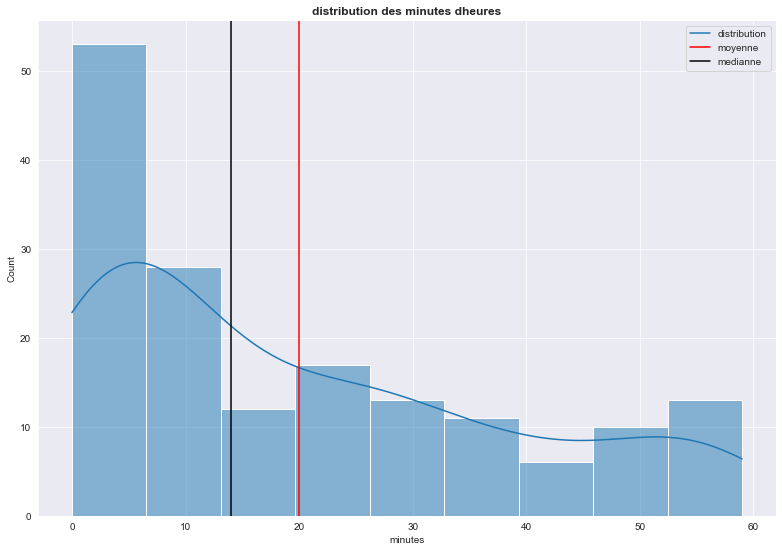

In [536]:
#plt.rcParams["figure.figsize"] = (18,18)
sns.displot(data=date_mini_maxi_df,x='minutes',kde=True)
plt.axvline(date_mini_maxi_df['minutes'].mean(),color='red')
plt.axvline(date_mini_maxi_df['minutes'].median(),color='black')
plt.legend(['distribution','moyenne','medianne'])
plt.title('distribution des minutes d''heures',fontweight='bold')

plt.gcf().set_size_inches(12,8)


plt.show()

###  Remarques : 
- on définera notre fenetre comme la moyenne des minutes : 20 minutes

<a id='4'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Deuxième approche</h1>

In [539]:
categorical_data

,user_lang,tweet_coordinates_geojson,country,tweet_source,user_location,tweet_coordinates_geom,hashtags,tweet_text,country_code,place_name,...,place_bbox_geojson,place_type,place_fullname,tweet_coordinates,tweet_mtion,tweet_lang,place_bbox_geom,clean_tweets,len_hashtags,len_mentions
0,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,séisme ; Istanbul ;,Un #séisme majeur menace #Istanbul – {Sciences...,None,None,...,None,None,None,None,None,fr,None,Un séisme majeur menace Istanbul – {Sciences²},2,0
1,None,None,None,"<a href=""http://twitter.com/download/android"" ...",None,None,None,Tremblement de terre M3.1 - FRANCE - 31km de L...,None,None,...,None,None,None,None,None,fr,None,Tremblement de terre M3.1 - FRANCE - 31km de L...,0,0
2,None,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",France,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,...,None,None,None,None,HuetSylvestre ;,fr,None,Un séisme majeur menace Istanbul – {Sciences²}...,0,1
3,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,...,None,None,None,None,None,fr,None,Un séisme majeur menace Istanbul – {Sciences²},0,0
4,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",94uzi,None,None,je suis morte ça crie comme si y avait un séisme,None,None,...,None,None,None,None,None,fr,None,je suis morte ça crie comme si y avait un séisme,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,None,None,None,"<a href=""http://wildmoka.com"" rel=""nofollow"">W...","Paris, France",None,Guadeloupe ; Richter ;,Réactions après le tremblement de terre ce jeu...,None,None,...,None,None,None,None,None,fr,None,Réactions après le tremblement de terre ce jeu...,2,0
517297,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",agen,None,None,Lisbonne : églises de Santa María de Carmo jam...,None,None,...,None,None,None,None,None,fr,None,Lisbonne : églises de Santa María de Carmo jam...,0,0
517298,None,None,None,"<a href=""http://twitter.com/download/android"" ...",Là.,None,None,@Ludovic_P_ - Un tremblement de terre.\n- Un v...,None,None,...,None,None,None,None,Ludovic_P_ ;,fr,None,_P_ - Un tremblement de terre.\n- Un volcan en...,0,1
517299,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,...,None,None,None,None,None,fr,None,Un séisme majeur menace Istanbul – {Sciences²},0,0


In [510]:
categorical_data.drop(['len_hashtags_','has_hash'],axis=1,inplace=True)

KeyError: "['has_hash'] not found in axis"

In [506]:
categorical_data

,user_lang,tweet_coordinates_geojson,country,tweet_source,user_location,tweet_coordinates_geom,hashtags,tweet_text,country_code,place_name,...,tweet_coordinates,tweet_mtion,tweet_lang,place_bbox_geom,clean_tweets,hashtags_,my_hash,len_hashtags_,len_mentions,len_hashtags
0,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,séisme ; Istanbul ;,Un #séisme majeur menace #Istanbul – {Sciences...,None,None,...,None,None,fr,None,Un séisme majeur menace Istanbul – {Sciences²},"{séisme, Istanbul}","[#séisme, #Istanbul]",20,0,2
1,None,None,None,"<a href=""http://twitter.com/download/android"" ...",None,None,None,Tremblement de terre M3.1 - FRANCE - 31km de L...,None,None,...,None,None,fr,None,Tremblement de terre M3.1 - FRANCE - 31km de L...,{},[],0,0,0
2,None,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",France,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,...,None,HuetSylvestre ;,fr,None,Un séisme majeur menace Istanbul – {Sciences²}...,{},[],0,1,0
3,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,...,None,None,fr,None,Un séisme majeur menace Istanbul – {Sciences²},{},[],0,0,0
4,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",94uzi,None,None,je suis morte ça crie comme si y avait un séisme,None,None,...,None,None,fr,None,je suis morte ça crie comme si y avait un séisme,{},[],0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,None,None,None,"<a href=""http://wildmoka.com"" rel=""nofollow"">W...","Paris, France",None,Guadeloupe ; Richter ;,Réactions après le tremblement de terre ce jeu...,None,None,...,None,None,fr,None,Réactions après le tremblement de terre ce jeu...,"{Richter., Guadeloupe.}","[#Guadeloupe., #Richter.]",23,0,2
517297,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",agen,None,None,Lisbonne : églises de Santa María de Carmo jam...,None,None,...,None,None,fr,None,Lisbonne : églises de Santa María de Carmo jam...,{},[],0,0,0
517298,None,None,None,"<a href=""http://twitter.com/download/android"" ...",Là.,None,None,@Ludovic_P_ - Un tremblement de terre.\n- Un v...,None,None,...,None,Ludovic_P_ ;,fr,None,_P_ - Un tremblement de terre.\n- Un volcan en...,{},[],0,1,0
517299,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,Un séisme majeur menace Istanbul – {Sciences²}...,None,None,...,None,None,fr,None,Un séisme majeur menace Istanbul – {Sciences²},{},[],0,0,0
